## Lab07 - Data preprocessing II
Name: Anh Kieu  
Class: CSCI 349 - Intro to Data Mining  
Semester: Spring 2021  
Instructor: Brian King  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1) Function: takes a filename (with path) as a string, and returns a completely processed pandas data frame of the data, ready for analysis.
- converting all numeric variables to their simplest numeric types
- converting the date/time stamp (first variable) to a pandas DatetimeIndex, which becomes the
actual index for the data frame.
- It should drop the date time variable after moving it to become the index.
- If you did not do this in the last lab, make sure that the DatetimeIndex is localized to a specific
timezone! This is very important! What time zone? Did you notice the header? The time stamp is in
GMT, so be sure to localize the index accordingly. HOW? After you set up the index, you can do:
df.index = df.index.tz_localize(tz='GMT')

In [2]:
def process_hourly_data(filename):
    # read file
    df = pd.read_csv(filename, skiprows = 16)
    df = df.iloc[:, :-1]
    # convert to simplest numeric types
    df["Number of Observations (n/a)"] = pd.to_numeric(df["Number of Observations (n/a)"], downcast = "unsigned")
    for i in range(2, df.shape[1]):
        df.iloc[:, i] = pd.to_numeric(df.iloc[:, i], downcast = "float")
    # convert date/time to pandas DateTimeIndex
    df["Date/Time (GMT)"] = pd.to_datetime(df["Date/Time (GMT)"])
    # drop date/time variable to index
    df.set_index(df["Date/Time (GMT)"], inplace = True)
    df.drop(columns = ["Date/Time (GMT)"], axis = 1, inplace = True)
    # localize
    df.index = df.index.tz_localize(tz = 'GMT')
    return df

#### 2) [P] df_kipt

In [3]:
df_kipt = process_hourly_data("../data/faa_hourly-KIPT_20000101-20201231.csv")

In [4]:
df_kipt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181943 entries, 2000-01-01 00:00:00+00:00 to 2020-12-31 23:00:00+00:00
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Number of Observations (n/a)   181943 non-null  uint8  
 1   Average Temp (F)               180938 non-null  float32
 2   Max Temp (F)                   180938 non-null  float32
 3   Min Temp (F)                   180938 non-null  float32
 4   Average Dewpoint Temp (F)      180816 non-null  float32
 5   1 Hour Precip (in)             30294 non-null   float32
 6   Max Wind Gust (mph)            24708 non-null   float32
 7   Average Relative Humidity (%)  177114 non-null  float32
 8   Average Wind Speed (mph)       181394 non-null  float32
 9   Average Station Pressure (mb)  181647 non-null  float32
 10  Average Wind Direction (deg)   148822 non-null  float32
 11  Max Wind Speed (mph)           181394 non-nul

In [5]:
df_kipt.describe()

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
count,181943.000000,180938.000000,180938.000000,180938.000000,180816.000000,30294.000000,24708.000000,177114.000000,181394.000000,181647.000000,148822.000000,181394.000000
mean,1.336990,51.373653,51.484375,51.269070,40.277889,0.030405,22.367857,68.680901,5.907989,1016.748596,175.469009,6.176690
std,0.851021,18.850195,18.868101,18.843729,18.966587,0.078683,7.489910,19.677162,5.187293,7.636579,119.212242,5.303467
min,0.000000,-11.900000,-11.900000,-11.900000,-20.900000,0.000000,0.000000,0.000000,0.000000,508.600006,0.000000,0.000000
25%,1.000000,36.000000,36.000000,36.000000,26.100000,0.000000,19.600000,54.000000,0.000000,1012.200012,70.000000,0.000000
50%,1.000000,52.000000,52.000000,51.799999,41.000000,0.000000,21.900000,71.000000,5.400000,1016.900024,210.000000,5.800000
75%,1.000000,66.900002,66.900002,66.900002,57.000000,0.030000,26.500000,86.000000,9.200000,1021.700012,280.000000,9.200000
max,10.000000,102.000000,102.000000,102.000000,79.000000,2.350000,88.599998,100.000000,76.000000,1044.400024,360.000000,76.000000


#### 3) [P] Missing values from each variable

In [6]:
df_kipt.isna().sum()

Number of Observations (n/a)          0
Average Temp (F)                   1005
Max Temp (F)                       1005
Min Temp (F)                       1005
Average Dewpoint Temp (F)          1127
1 Hour Precip (in)               151649
Max Wind Gust (mph)              157235
Average Relative Humidity (%)      4829
Average Wind Speed (mph)            549
Average Station Pressure (mb)       296
Average Wind Direction (deg)      33121
Max Wind Speed (mph)                549
dtype: int64

#### 4) [P/M] Let's pay attention to "Average Temp (F)". 
Are there hours of the day are most likely to have
missing values? Report the frequency over each hour that has missing "Average Temp (F)" values. Be
sure to report the LOCAL times according to the time zone "US/Eastern". Output the hours in order of the
most frequently missing to least. Then, as a comment, interpret your findings. Do you see a pattern? Do
missing temps tend to happen at a certain time of day?

In [7]:
total = df_kipt["Average Temp (F)"].groupby(df_kipt.index.hour).count()
missing = df_kipt["Average Temp (F)"].isna().groupby(df_kipt.index.hour).sum()
freq = missing/total
freq.sort_values()

Date/Time (GMT)
1     0.004099
0     0.004232
3     0.004372
2     0.004491
23    0.004640
5     0.004645
4     0.004651
6     0.004652
22    0.004654
7     0.004907
8     0.004918
20    0.005024
21    0.005045
9     0.005048
12    0.005299
10    0.005304
13    0.005426
11    0.005436
19    0.005562
18    0.006231
14    0.007838
17    0.008508
16    0.008644
15    0.009727
Name: Average Temp (F), dtype: float64

From 14:00 to 18:00, there are more missing values. These are afternoon hours.

#### 5) [P/M] Average Temp for dayofweek

In [8]:
total = df_kipt["Average Temp (F)"].groupby(df_kipt.index.dayofweek).count()
missing = df_kipt["Average Temp (F)"].isna().groupby(df_kipt.index.dayofweek).sum()
freq = missing/total
freq.sort_values()

Date/Time (GMT)
5    0.001308
6    0.004057
4    0.005304
0    0.006002
3    0.006209
2    0.007591
1    0.008440
Name: Average Temp (F), dtype: float64

There are more missing values at the beginning of the week compared to the end of the week.

#### 6) [P] Read in the file FAA_PA_stations.csv provided on Moodle. It's not actually a comma separated file, but a tab separated file. Store the data frame as stations. Show stations.info() after you read in the data.

In [9]:
stations = pd.read_csv("../data/FAA_PA_stations.csv", sep = '\t')
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                46 non-null     object 
 1   Name              46 non-null     object 
 2   County            45 non-null     object 
 3   State             46 non-null     object 
 4   Lat               46 non-null     float64
 5   Lon               46 non-null     float64
 6   Elevation (feet)  46 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.6+ KB


#### 7) [P] As usual, you must always assess your missing data, if any. 
Are there any observations (rows) in stations that have missing data? Output them, then eliminate them from your data. Be sure to
reset_index(drop=True) to reset the index in case any observations are dropped. Output
stations.info() again.

In [10]:
stations[stations.isnull().any(axis=1)]

,ID,Name,County,State,Lat,Lon,Elevation (feet)
24,KUKT,QUAKERTOWN ARP,NaN,PA,40.435,-75.381,524.9


In [11]:
stations = stations.dropna().reset_index(drop = True)

#### 8) [P] Examine the data frame of stations by showing the first few observations using stations.head(10)

In [12]:
stations.head(10)

,ID,Name,County,State,Lat,Lon,Elevation (feet)
0,KABE,ALLENTOWN,LEHIGH,PA,40.65,-75.44,376.0
1,KAOO,ALTOONA,BLAIR,PA,40.29,-78.32,1504.0
2,KBVI,BEAVER FALLS,BEAVER,PA,40.77,-80.39,1230.0
3,KBFD,BRADFORD,MCKEAN,PA,41.80,-78.64,2142.0
4,KBTP,BUTLER,BUTLER,PA,40.77,-79.95,1250.0
5,KCXY,CAPITAL CITY,YORK,PA,40.22,-76.85,340.0
6,KFIG,CLEARFIELD,CLEARFIELD,PA,41.04,-78.41,1516.0
7,KDYL,DOYLESTOWN,BUCKS,PA,40.33,-75.12,394.0
8,KDUJ,DUBOIS,JEFFERSON,PA,41.18,-78.90,1814.0
9,KERI,ERIE,ERIE,PA,42.08,-80.17,730.0


#### 9) Create a new variable in stations called "distKIPT" that stores the distance of every station in PA to Williamsport (KIPT). Use a standard Euclidean distance calculation (over latitude and longitude) to compute the distance between the stations.

In [13]:
# stations['distKIPT'] 
coordinate_kipt = (stations[stations["ID"] == "KIPT"].iat[0,4], stations[stations["ID"] == "KIPT"].iat[0,5])
coordinate_kipt

(41.24, -76.92)

In [14]:
# ref: https://stackoverflow.com/questions/40452759/pandas-latitude-longitude-to-distance-between-successive-rows
# vectorized haversine function
def haversine(lat2, lon2, lat1 = coordinate_kipt[0], lon1 = coordinate_kipt[1], to_radians=True, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    a = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [15]:
stations['distKIPT'] = stations.apply(lambda row: haversine(row["Lat"], row["Lon"]), axis = 1)

In [16]:
stations.head(10)

,ID,Name,County,State,Lat,Lon,Elevation (feet),distKIPT
0,KABE,ALLENTOWN,LEHIGH,PA,40.65,-75.44,376.0,140.552254
1,KAOO,ALTOONA,BLAIR,PA,40.29,-78.32,1504.0,158.301070
2,KBVI,BEAVER FALLS,BEAVER,PA,40.77,-80.39,1230.0,295.811235
3,KBFD,BRADFORD,MCKEAN,PA,41.80,-78.64,2142.0,156.146548
4,KBTP,BUTLER,BUTLER,PA,40.77,-79.95,1250.0,259.558669
5,KCXY,CAPITAL CITY,YORK,PA,40.22,-76.85,340.0,113.572083
6,KFIG,CLEARFIELD,CLEARFIELD,PA,41.04,-78.41,1516.0,126.739313
7,KDYL,DOYLESTOWN,BUCKS,PA,40.33,-75.12,394.0,182.217314
8,KDUJ,DUBOIS,JEFFERSON,PA,41.18,-78.90,1814.0,165.761549
9,KERI,ERIE,ERIE,PA,42.08,-80.17,730.0,285.667784


#### 10) [P] Output the top 10 stations that are closest to KIPT. (The closest one should be to itself!) The stations should be listed in order of increasing distance from KIPT.

In [17]:
stations.sort_values(by = "distKIPT").head(10)

,ID,Name,County,State,Lat,Lon,Elevation (feet),distKIPT
29,KIPT,WILLIAMSPORT,LYCOMING,PA,41.24,-76.92,520.0,0.000000
26,KSEG,SELINSGROVE,SNYDER,PA,40.82,-76.86,444.0,46.972272
27,KUNV,UNIVERSITY PARK,CENTRE,PA,40.85,-77.85,1240.0,89.237083
18,KMUI,MUIR ARMY AIR FIELD,LEBANON,PA,40.43,-76.57,489.0,94.758675
25,KAVP,SCRANTON,LUZERNE,PA,41.33,-75.72,956.0,100.764519
5,KCXY,CAPITAL CITY,YORK,PA,40.22,-76.85,340.0,113.572083
16,KMDT,MIDDLETOWN,DAUPHIN,PA,40.19,-76.76,312.0,117.530781
24,KRDG,READING,BERKS,PA,40.37,-75.96,360.0,126.043135
6,KFIG,CLEARFIELD,CLEARFIELD,PA,41.04,-78.41,1516.0,126.739313
17,KMPO,MOUNT POCONO,MONROE,PA,41.14,-75.37,1895.0,130.174143


#### 11) [P] Using your results, go back to the PSU climate website (http://climate.met.psu.edu/data/ida/) and
download the faa_hourly data for the THREE closest stations that have hourly data available in the same date
range as the data you downloaded from KIPT (i.e. 2000-01-01 à 2020-12-31).

In [18]:
df_kseg = process_hourly_data("../data/faa_hourly-KSEG_20000101-20201231.csv")
df_kunv = process_hourly_data("../data/faa_hourly-KUNV_20000101-20201231.csv")
df_kcxy = process_hourly_data("../data/faa_hourly-KCXY_20000101-20201231.csv")

In [19]:
df_kseg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180858 entries, 2000-01-01 00:00:00+00:00 to 2020-12-31 23:00:00+00:00
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Number of Observations (n/a)   180858 non-null  uint8  
 1   Average Temp (F)               180242 non-null  float32
 2   Max Temp (F)                   180242 non-null  float32
 3   Min Temp (F)                   180242 non-null  float32
 4   Average Dewpoint Temp (F)      180049 non-null  float32
 5   1 Hour Precip (in)             27623 non-null   float32
 6   Max Wind Gust (mph)            19268 non-null   float32
 7   Average Relative Humidity (%)  176224 non-null  float32
 8   Average Wind Speed (mph)       180029 non-null  float32
 9   Average Station Pressure (mb)  180610 non-null  float32
 10  Average Wind Direction (deg)   131220 non-null  float32
 11  Max Wind Speed (mph)           180029 non-nul

In [20]:
df_kunv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177251 entries, 2000-01-01 00:00:00+00:00 to 2020-12-31 23:00:00+00:00
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Number of Observations (n/a)   177251 non-null  uint8  
 1   Average Temp (F)               175777 non-null  float32
 2   Max Temp (F)                   175777 non-null  float32
 3   Min Temp (F)                   175777 non-null  float32
 4   Average Dewpoint Temp (F)      175766 non-null  float32
 5   1 Hour Precip (in)             7731 non-null    float32
 6   Max Wind Gust (mph)            33669 non-null   float32
 7   Average Relative Humidity (%)  170826 non-null  float32
 8   Average Wind Speed (mph)       176919 non-null  float32
 9   Average Station Pressure (mb)  175686 non-null  float32
 10  Average Wind Direction (deg)   160305 non-null  float32
 11  Max Wind Speed (mph)           176919 non-nul

In [21]:
df_kcxy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135921 entries, 2000-01-01 00:00:00+00:00 to 2020-12-31 23:00:00+00:00
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Number of Observations (n/a)   135921 non-null  uint8  
 1   Average Temp (F)               135445 non-null  float32
 2   Max Temp (F)                   135445 non-null  float32
 3   Min Temp (F)                   135445 non-null  float32
 4   Average Dewpoint Temp (F)      135298 non-null  float32
 5   1 Hour Precip (in)             18708 non-null   float32
 6   Max Wind Gust (mph)            15967 non-null   float32
 7   Average Relative Humidity (%)  131757 non-null  float32
 8   Average Wind Speed (mph)       135712 non-null  float32
 9   Average Station Pressure (mb)  135246 non-null  float32
 10  Average Wind Direction (deg)   123585 non-null  float32
 11  Max Wind Speed (mph)           135712 non-nul

#### 12) [P] Create a new data frame called df_ave_temps that contains the average temperature from all four stations.

In [22]:
new_index = pd.date_range(start = "2000-01-01 00:00:00", end = "2020-12-31 23:00:00", tz = "GMT", freq = "1H")

In [23]:
df_ave_temps = pd.DataFrame(index = new_index)
df_ave_temps.loc[:, "KIPT"] = df_kipt.loc[:, "Average Temp (F)"]
df_ave_temps.loc[:, "KSEG"] = df_kseg.loc[:, "Average Temp (F)"]
df_ave_temps.loc[:, "KUNV"] = df_kunv.loc[:, "Average Temp (F)"]
df_ave_temps.loc[:, "KCXY"] = df_kcxy.loc[:, "Average Temp (F)"]

In [24]:
df_ave_temps.head(10)

,KIPT,KSEG,KUNV,KCXY
2000-01-01 00:00:00+00:00,26.1,27.000000,21.200001,28.0
2000-01-01 01:00:00+00:00,26.1,27.000000,21.200001,27.0
2000-01-01 02:00:00+00:00,26.1,27.000000,21.200001,26.1
2000-01-01 03:00:00+00:00,26.1,26.100000,21.200001,26.1
2000-01-01 04:00:00+00:00,26.1,26.100000,21.200001,25.0
2000-01-01 05:00:00+00:00,25.0,21.900000,39.200001,NaN
2000-01-01 06:00:00+00:00,23.0,21.549999,NaN,NaN
2000-01-01 07:00:00+00:00,23.0,21.100000,NaN,NaN
2000-01-01 08:00:00+00:00,21.9,21.549999,NaN,NaN
2000-01-01 09:00:00+00:00,21.9,21.900000,24.799999,NaN


In [25]:
df_ave_temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184104 entries, 2000-01-01 00:00:00+00:00 to 2020-12-31 23:00:00+00:00
Freq: H
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   KIPT    180938 non-null  float32
 1   KSEG    180242 non-null  float32
 2   KUNV    175777 non-null  float32
 3   KCXY    135445 non-null  float32
dtypes: float32(4)
memory usage: 4.2 MB


#### 13) [P] Each station has missing observations for average temperature. Report the number of missing average temperature readings in df_ave_temps for each location.

In [26]:
df_ave_temps.isna().sum()

KIPT     3166
KSEG     3862
KUNV     8327
KCXY    48659
dtype: int64

#### 14) [P] Now, let's get to why we are considering these alternative stations. Report the number of missing data in KIPT that have at least one alternative station with an existing value.

In [27]:
nans_kipt = df_ave_temps[df_ave_temps["KIPT"].isna()]
alternatives = nans_kipt[nans_kipt[["KUNV", "KSEG", "KCXY"]].notna().any(axis = 1)]

In [28]:
print(f"There are {alternatives.shape[0]} out of {nans_kipt.shape[0]} missing KIPT temps that can be restored from other locations.")

There are 1924 out of 3166 missing KIPT temps that can be restored from other locations.


In [29]:
alternatives.head(10)

,KIPT,KSEG,KUNV,KCXY
2000-01-03 18:00:00+00:00,NaN,53.099998,57.200001,NaN
2000-01-05 17:00:00+00:00,NaN,35.099998,32.000000,NaN
2000-01-06 20:00:00+00:00,NaN,41.000000,39.200001,NaN
2000-01-07 14:00:00+00:00,NaN,36.000000,35.599998,35.599998
2000-01-10 02:00:00+00:00,NaN,39.000000,37.400002,NaN
2000-01-10 03:00:00+00:00,NaN,39.000000,35.599998,NaN
2000-01-10 04:00:00+00:00,NaN,36.000000,NaN,NaN
2000-01-10 05:00:00+00:00,NaN,32.000000,NaN,NaN
2000-01-10 06:00:00+00:00,NaN,34.000000,NaN,NaN
2000-01-10 07:00:00+00:00,NaN,35.349998,NaN,NaN


#### 15) Display a barchart showing the number of missing data in KIPT by year that CANNOT be restored from any of the other stations.

In [30]:
not_restored = nans_kipt[nans_kipt[["KUNV", "KSEG", "KCXY"]].isna().all(axis = 1)]

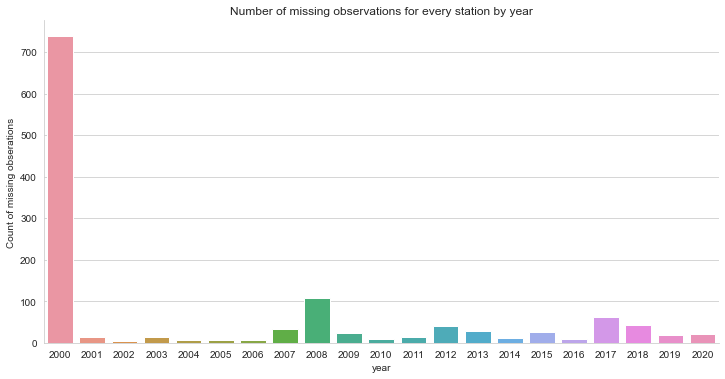

In [31]:
sns.set_style("whitegrid")
plot = sns.catplot(x = not_restored.index.year, data = not_restored, kind = 'count', aspect = 2)
plt.title("Number of missing observations for every station by year")
plot.set_axis_labels("year", "Count of missing obserations")
plt.show()

#### 16) Confirm this visually by creating a line plot that plots all four stations for that one year, with each station a different color.

In [32]:
df = df_ave_temps.melt(value_vars=["KIPT","KSEG","KUNV","KCXY"], var_name="location", value_name="Ave Temp (F)", ignore_index=False)
df = df[df.index.year == 2000]

In [33]:
df["date"] = df.index

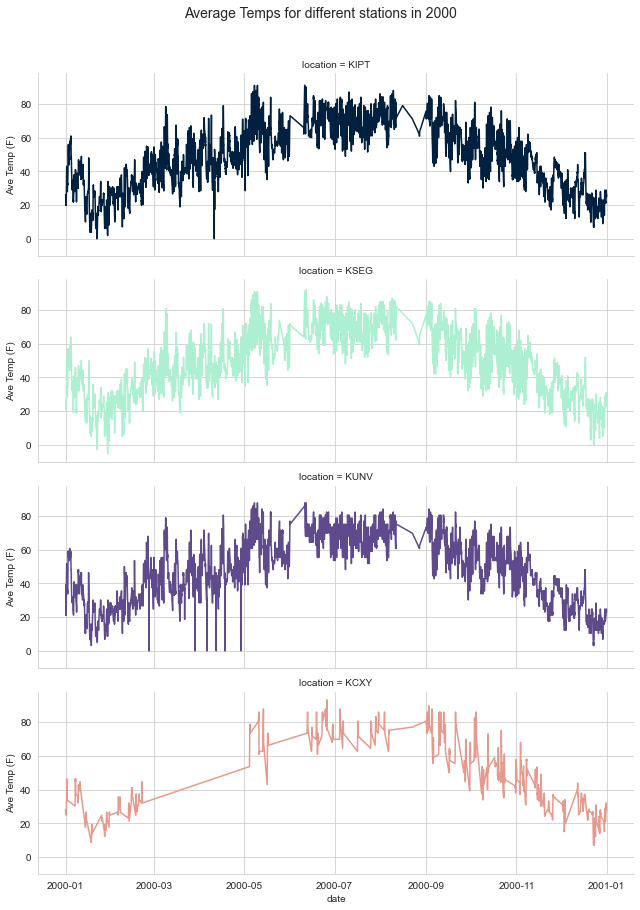

In [34]:
g = sns.FacetGrid(df, row ="location", hue = 'location', palette = ['#00203FFF', '#ADEFD1FF', '#5F4B8BFF', '#E69A8DFF'], aspect = 3)
g.map_dataframe(sns.lineplot, "date", "Ave Temp (F)")
g.fig.suptitle('Average Temps for different stations in 2000', y = 1.05, fontsize = 14)
plt.show()

#### 17) [P] Looking at your plot of the year 2000 over all stations should reveal that KUNV is problematic at 6 different times. Report these observations, but report them from our full KUNV dataframe. Show only those observations.

In [33]:
sub = df_kunv[df_kunv.index.year == 2000]
sub[sub["Average Temp (F)"].isna()].head(4)

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
Date/Time (GMT),,,,,,,,,,,,
2000-01-04 10:00:00+00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,NaN,200.0,8.1
2000-01-04 15:00:00+00:00,1,NaN,NaN,NaN,NaN,NaN,28.799999,NaN,12.7,NaN,210.0,12.7
2000-01-05 10:00:00+00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05 11:00:00+00:00,1,NaN,NaN,NaN,NaN,NaN,18.400000,NaN,6.9,NaN,320.0,6.9


#### 18) [M] How could you algorithmically detect those problems? Keep in mind that simply saying to turn 0.0 into NaN is not an acceptable solution. 0.0 may very well be a real value!

We could potentially compute the relative change, and if the relative changes are too big between two continuous value, there might be something off going on.

#### 19) [P] Now, write the code to generate line plot(s) for all of KIPT visually, and only KIPT.

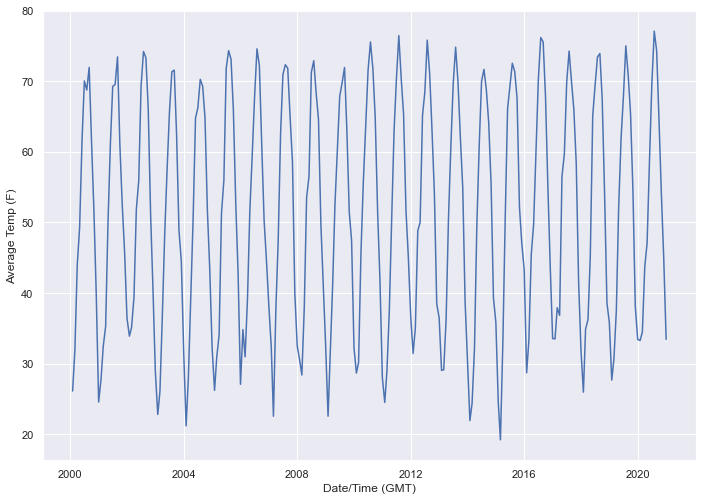

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
mean_kipt_month = df_kipt.resample('M').mean()
sns.lineplot(data = mean_kipt_month, x = mean_kipt_month.index, y = 'Average Temp (F)')
plt.show()

#### 20) [P] Compute a new Series that represents a running delta temperature between adjacent average temperature readings for KIPT. Then, plot the distribution of these data using whatever visualization you think characterizes this distribution best.

In [38]:
delta_avg = df_kipt['Average Temp (F)'].diff()

D:\_work\coding\anaconda\envs\csci349\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


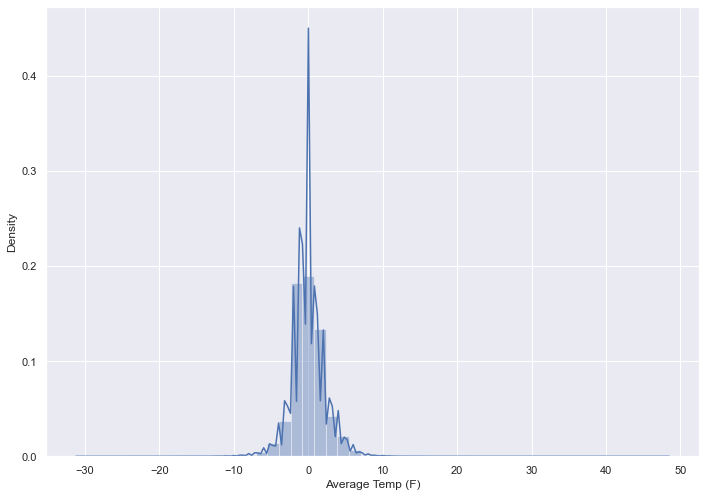

In [44]:
sns.distplot(delta_avg)
plot.set(xlabel='change in temperature')

#### 21) [P] Perhaps it's more important to select the station that has the most similar values. 
Write a function called compare_station that takes two Series objects of numeric data, and computes the sum of the absolute
value of the difference between each pair of numbers in both Series.

In [45]:
def compare_station(series1, series2):
    return np.absolute(series1 - series2).sum()

In [46]:
print(f"KUNV: {compare_station(df_ave_temps['KIPT'], df_ave_temps['KUNV'])}")
print(f"KSEG: {compare_station(df_ave_temps['KIPT'], df_ave_temps['KSEG'])}")
print(f"KCXY: {compare_station(df_ave_temps['KIPT'], df_ave_temps['KCXY'])}")

KUNV: 521875.125
KSEG: 369160.0625
KCXY: 508277.34375


#### 22) [P] As we learned in class, you could compute a correlation coefficient between columns of data to determine similarity. 
Compute the correlation coefficient between the average temp of KIPT, and each of the other
stations you downloaded. They should all be very close to 1, but not quite.

In [47]:
print(f"KSEG: {df_ave_temps['KIPT'].corr(df_ave_temps['KSEG'])}")
print(f"KUNV: {df_ave_temps['KIPT'].corr(df_ave_temps['KUNV'])}")
print(f"KCXY: {df_ave_temps['KIPT'].corr(df_ave_temps['KCXY'])}")

KSEG: 0.988237533459633
KUNV: 0.979861924488062
KCXY: 0.9809077560862824


#### 23) [M] Interpret what you have observed so far. Which station is most similar? How would this affect your approach to cleaning your data? Are there other things you might do to clean your data?

Regarding both correlations and sum of absolute difference pairwise values, Selingrove's data seems to be the most similar, followed by Capital City data and then University Park data. Thus, I will likely to use KSEG data to decide the missing values in KIPT. If KSEG is not available, I will use KCXY and then lastly resort to KUNV. However, KCXY has a lot of missing data from our findings above, so I might just use KUNV

#### 24) [P] Create a new attribute called KIPT_GOOD in your df_ave_temps data frame that keeps all of the original average temp data, but takes the readings from the closest station ith available data to replace in the NA values.

In [48]:
print(f"Starting with {df_ave_temps.shape[0] - df_ave_temps['KIPT'].count()} missing values in KIPT")
df_ave_temps['KIPT_GOOD'] = df_ave_temps['KIPT'].combine_first(df_ave_temps['KSEG'])
print(f"Copying {df_ave_temps['KIPT_GOOD'].count() - df_ave_temps['KIPT'].count()} values from KSEG")
df_ave_temps['KIPT_GOOD'] = df_ave_temps['KIPT_GOOD'].combine_first(df_ave_temps['KUNV'])
print(f"Copying {df_ave_temps['KIPT_GOOD'].count() - df_ave_temps['KIPT'].count()} values from KUNV")
print(f"We still have {df_ave_temps['KIPT_GOOD'].isna().sum()} missing values in KIPT")

Starting with 3166 missing values in KIPT
Copying 1564 values from KSEG
Copying 1907 values from KUNV
We still have 1259 missing values in KIPT


#### 25) [P] We want to consider setting singleton missing observations, i.e. those missing values that are surrounded by two good observations, as candidates to fill in with the average of their surrounding values.

In [49]:
df_ave_temps[df_ave_temps.KIPT_GOOD.isna() & df_ave_temps.KIPT_GOOD.shift().notna() & df_ave_temps.KIPT_GOOD.shift(-1).notna()].shape[0]

161

#### 26) [P] Now, convert all singletons missing values in KIPT_GOOD to an average of the surrounding observations. For example [..., 2, NaN, 5, ...] would be filled in with (2+5)/2 = 3.5 for the NaN value. Then, report the number of values that are still missing in KIPT_GOOD.

In [50]:
med = (df_ave_temps["KIPT_GOOD"].shift() + df_ave_temps["KIPT_GOOD"].shift(-1))/2
df_ave_temps['KIPT_GOOD'] = df_ave_temps['KIPT_GOOD'].combine_first(med)

In [51]:
df_ave_temps['KIPT_GOOD'].isna().sum()

1098

#### 27) [P] Eliminate that first year of data from df_ave_temps. There are too many missing values in these data to make it worthwhile.

In [52]:
df_ave_temps = df_ave_temps[df_ave_temps.index.year != 2000]
df_ave_temps.head(4)

,KIPT,KSEG,KUNV,KCXY,KIPT_GOOD
2001-01-01 00:00:00+00:00,21.0,19.0,15.8,23.0,21.0
2001-01-01 01:00:00+00:00,19.9,19.0,14.0,21.9,19.9
2001-01-01 02:00:00+00:00,19.0,17.1,15.8,21.0,19.0
2001-01-01 03:00:00+00:00,19.0,14.0,15.8,19.0,19.0


#### 28) [P] Generate an updated barplot of the total number of missing values in df_ave_temps.KIPT_GOOD by year.

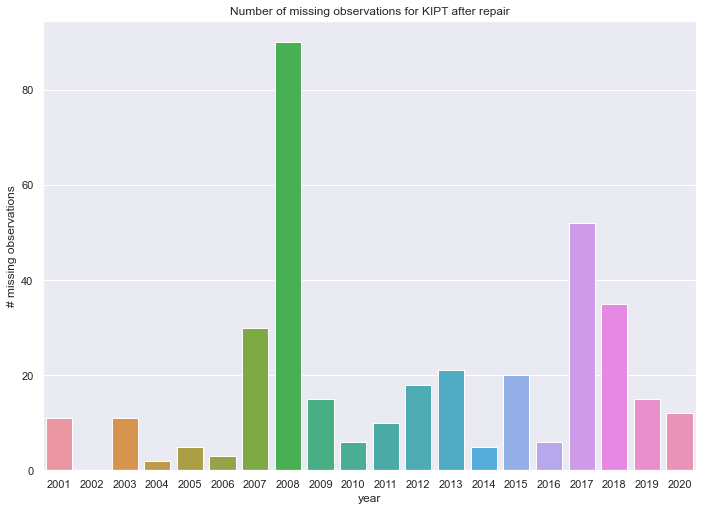

In [53]:
missing_by_year = df_ave_temps.isna().resample('Y').sum()
missing_by_year.index = (missing_by_year.index.year)
plot = sns.barplot(data = missing_by_year, x = missing_by_year.index, y = "KIPT_GOOD")
plt.title("Number of missing observations for KIPT after repair")
plot.set(xlabel='year', ylabel='# missing observations')
plt.show()

#### 29) [P] Finally, create some good, clean line plots of KIPT_GOOD. Create at least three plots using different averaging times. One should be the raw data. I would suggest reating another one by month, and then the final one by year. Be sure they are labeled.

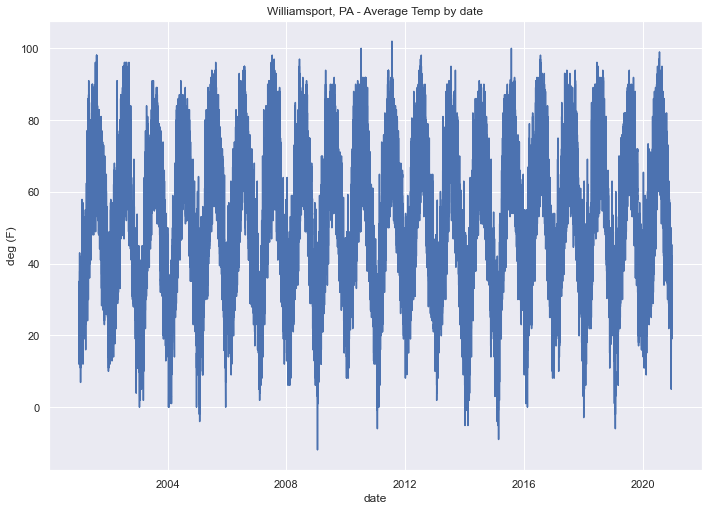

In [54]:
plot = sns.lineplot(x= df_ave_temps.index, y = 'KIPT_GOOD', data = df_ave_temps)

plt.title("Williamsport, PA - Average Temp by date")
plot.set(xlabel='date', ylabel='deg (F)')
plt.show()

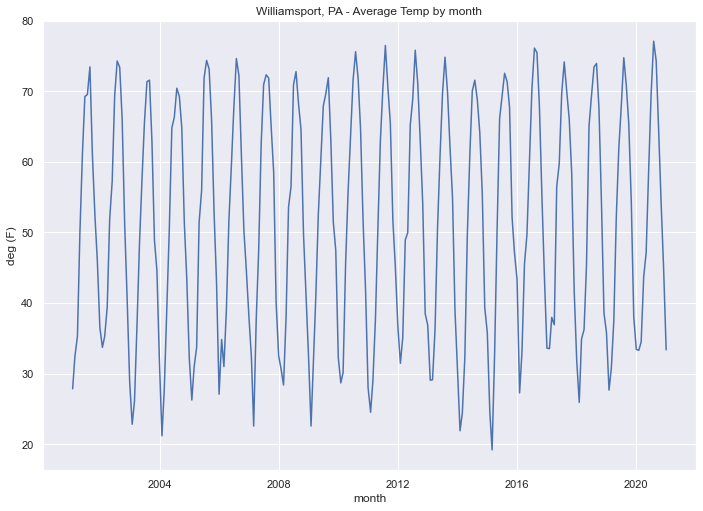

In [55]:
mean_month = df_ave_temps.resample('M').mean()
plot = sns.lineplot(x= mean_month.index, y = 'KIPT_GOOD', data = mean_month)
plt.title("Williamsport, PA - Average Temp by month")
plot.set(xlabel='month', ylabel='deg (F)')
plt.show()

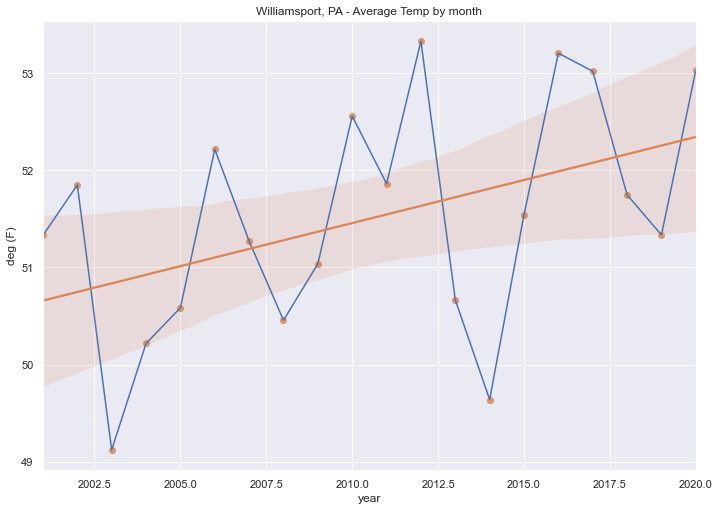

In [57]:
mean_year = df_ave_temps.resample('Y').mean()
plot = sns.lineplot(x= mean_year.index.year, y = 'KIPT_GOOD', data = mean_year)
plt.title("Williamsport, PA - Average Temp by month")
sns.regplot(x = mean_year.index.year, y = 'KIPT_GOOD', data = mean_year)
plot.set(xlabel='year', ylabel='deg (F)')
plt.show()